<a href="https://colab.research.google.com/github/AmandaCatelanC/Transfer_Learning/blob/main/Calculo_matriz_conf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [3]:
!pip install tensorflow

In [4]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [5]:
tf.__version__

'2.17.1'

In [6]:
%load_ext tensorboard

In [7]:
logdir = 'log'

In [8]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
teste_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
          y=train_labels,
          epochs=5,
          validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.8948 - loss: 0.3361 - val_accuracy: 0.9804 - val_loss: 0.0579
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9836 - loss: 0.0519 - val_accuracy: 0.9862 - val_loss: 0.0420
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9898 - loss: 0.0332 - val_accuracy: 0.9885 - val_loss: 0.0398
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.9921 - loss: 0.0236 - val_accuracy: 0.9914 - val_loss: 0.0282
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9938 - loss: 0.0193 - val_accuracy: 0.9918 - val_loss: 0.0265


In [13]:
import numpy as np

# Obter os rótulos verdadeiros
y_true = test_labels

# Prever as probabilidades para cada classe
y_pred_probs = model.predict(test_images)

# Converter as probabilidades em classes previstas
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [12]:
classes = [0,1,2,3,4,5,6,7,8,9]

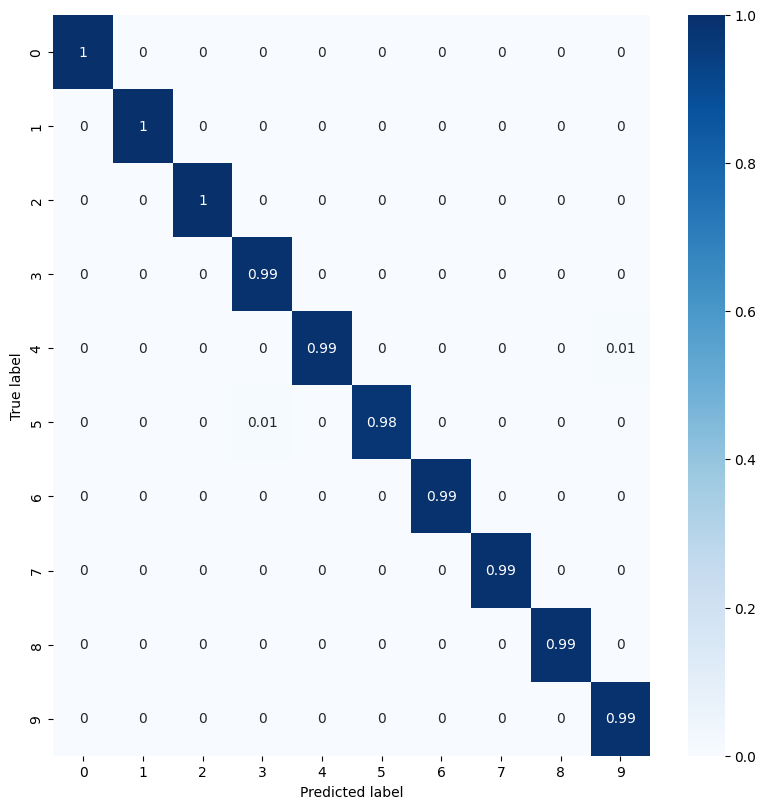

In [14]:
con_mat = tf.math.confusion_matrix(labels = y_true, predictions= y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float')/con_mat.sum(axis=1)[:, np.newaxis], decimals = 2)

con_mat_df = pd.DataFrame(con_mat_norm,
                          index = classes,
                          columns = classes)

figure = plt.figure(figsize = (8,8))
sns.heatmap(con_mat_df, annot= True, cmap = plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [16]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(64, (3,3), activation= 'relu'))

model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation= 'relu'))
model1.add(layers.Dense(10, activation= 'softmax'))

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
print(con_mat)  # Matriz original

[[ 977    0    1    0    0    0    0    1    0    1]
 [   0 1131    1    0    0    0    1    2    0    0]
 [   1    0 1028    0    0    0    0    2    1    0]
 [   0    0    2 1001    0    3    0    1    3    0]
 [   0    0    1    0  975    0    0    1    0    5]
 [   2    0    0    7    0  876    3    1    3    0]
 [   4    2    0    0    1    1  949    0    1    0]
 [   0    3    4    0    0    0    0 1020    0    1]
 [   1    0    2    0    0    0    0    2  967    2]
 [   1    0    0    1    3    4    0    4    2  994]]


In [25]:
import numpy as np

# Função para calcular as métricas
def calcular_metricas(con_mat):
    n_classes = len(con_mat)
    sensibilidade = []
    especificidade = []
    precisao = []
    acuracia = []  # Correção aqui para o nome da variável
    f_score = []

    for i in range(n_classes):
        TP = con_mat[i][i]  # Verdadeiros positivos (diagonal principal)
        FP = sum(con_mat[:, i]) - TP  # Falsos positivos (coluna inteira menos TP)
        FN = sum(con_mat[i]) - TP  # Falsos negativos (linha inteira menos TP)
        TN = np.sum(con_mat) - (TP + FP + FN)  # Verdadeiros negativos

        # Cálculos das métricas
        if TP + FN != 0:
            sens = TP / (TP + FN)
        else:
            sens = 0

        if TN + FP != 0:
            espec = TN / (TN + FP)
        else:
            espec = 0

        if TP + FP != 0:
            prec = TP / (TP + FP)
        else:
            prec = 0

        acur = (TP + TN) / np.sum(con_mat)  # Acurácia
        if prec + sens != 0:
            f1 = 2 * (prec * sens) / (prec + sens)  # F1-score
        else:
            f1 = 0

        # Adiciona os resultados
        sensibilidade.append(sens)
        especificidade.append(espec)
        precisao.append(prec)
        acuracia.append(acur)
        f_score.append(f1)

    return sensibilidade, especificidade, precisao, acuracia, f_score

# Calculando as métricas
sensibilidade, especificidade, precisao, acuracia, f_score = calcular_metricas(con_mat)

# Exibindo os resultados
for i in range(len(sensibilidade)):
    print(f"Classe {i}: Sensibilidade={sensibilidade[i]:.2f}, Especificidade={especificidade[i]:.2f}, Precisão={precisao[i]:.2f}, Acurácia={acuracia[i]:.2f}, F1-score={f_score[i]:.2f}")



Classe 0: Sensibilidade=1.00, Especificidade=1.00, Precisão=0.99, Acurácia=1.00, F1-score=0.99
Classe 1: Sensibilidade=1.00, Especificidade=1.00, Precisão=1.00, Acurácia=1.00, F1-score=1.00
Classe 2: Sensibilidade=1.00, Especificidade=1.00, Precisão=0.99, Acurácia=1.00, F1-score=0.99
Classe 3: Sensibilidade=0.99, Especificidade=1.00, Precisão=0.99, Acurácia=1.00, F1-score=0.99
Classe 4: Sensibilidade=0.99, Especificidade=1.00, Precisão=1.00, Acurácia=1.00, F1-score=0.99
Classe 5: Sensibilidade=0.98, Especificidade=1.00, Precisão=0.99, Acurácia=1.00, F1-score=0.99
Classe 6: Sensibilidade=0.99, Especificidade=1.00, Precisão=1.00, Acurácia=1.00, F1-score=0.99
Classe 7: Sensibilidade=0.99, Especificidade=1.00, Precisão=0.99, Acurácia=1.00, F1-score=0.99
Classe 8: Sensibilidade=0.99, Especificidade=1.00, Precisão=0.99, Acurácia=1.00, F1-score=0.99
Classe 9: Sensibilidade=0.99, Especificidade=1.00, Precisão=0.99, Acurácia=1.00, F1-score=0.99
